| [README](README.ipynb) <= | VEC3 : Deux bases | => [README](README.ipynb) |
|---------------------------|------------------|-----------------------------------|

# VEC3 - Deux bases
---

Un vecteur de $\mathbb{R}^N$ peut être vu comme un signal discret :
 - de base temporelle $\left(\delta[\bullet-n]\right)$ une suite discrète infinie bornée : [VEC1 suite support borné](../cours/notebooks/VEC1_bases_temporelles.ipynb#Prolongement-dans-$\mathbb{R}^N_b$-:-suites-r%C3%A9elles-%C3%A0-support-born%C3%A9) où $\delta$ est l'impulsion unité centrée en 0.
 - de base temporelle $\left(I\!I\!I_N[\bullet-n]\right)$ une suite N-périodique discrète [VEC1 suite N périodiques](../cours/notebooks/VEC1_bases_temporelles.ipynb#Prolongement-dans-$\mathbb{R}^N_p$-:-suites-r%C3%A9elles-de-pr%C3%A9riode-N) où la lettre cyrillique *sha* $I\!I\!I_N$ désigne le peigne d'impulsions unités N périodique.
 
Une deuxième base fréquentielle peut être ajoutée à partir d'ondes compelxes :
 - la base fréquentielle $\left(w_f\right)$ avec $f\in[0, F_e[$ pour les suites bornées permet d'établir la Transformée de Fourier des Signaux Discret (TFSD)
 - la base fréquentielle $\left(w_n\right)$ avec $n\in[\![0 ; N[\![$ pour les suites N périodiques permet d'établir la Transformée de Fourier Discret (TFD) d'algorithme rapide Fast Fourier Transform (FFT).

Pour cela nous allons voir :
 - [A](#A---Coordonn%C3%A9es-fr%C3%A9quentielles-:-TFD-inverse) - Coordonnées en fréquence : TFD inverse 
 - [B](#B---Filtrage-fr%C3%A9quentiel) - Filtrage fréquentiel
 - [C](#C---Projection-:-produit-scalaire) - Produit scalaire
 - [D](#D---D%C3%A9composition-dans-la-base-de-fr%C3%A9quencielle-:-TFD) - Décomposition dans la base fréquentielle : TFD
 - [E](#E--dualit%C3%A9) - Dualité de la transformée
 


## A - Coordonnées fréquentielles : TFD inverse
---

Par exemple le vecteur $v = [1, 2, 3, 4]$ peut indiquer les coordonnées du signal $\vec{s}$ dans la base fréquentielle $W = \left(w_n\right)$ des signaux discrets de période 4 :
> $v$ est alors les valeurs de la Transformée de Fourier Discrète (TFD) du signal $\vec{s}$ notée $\hat{S}$ 

Reprenons d'abord le code de [FREQ2 partie C](FREQ2_ondes_discretes.ipynb#C----Bases-de-fr%C3%A9quences-TFD/FFT) qui génère la matrice W des ondes complexes $w_0$ à $w_3$ (une onde par rangée) :

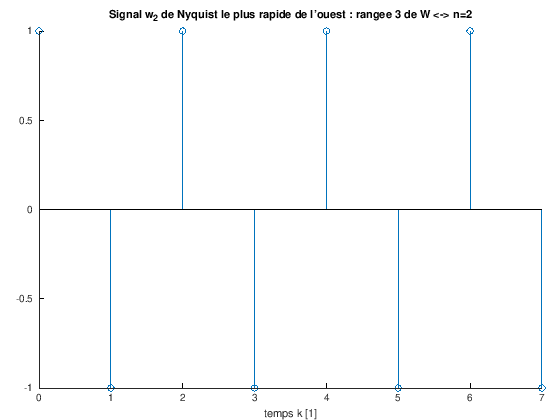

In [1]:
N=4;
k = 0:7;               % dim (1x8)
n = transpose(0:3);    % dim (4x1)
nk = n*k;             % dim (4x1).(1x8)=(4x8)
q = exp(i*2*pi/N);    % q=i ici
W = q .^ nk;            % on vectorise avec . l'opérateur ^

w_0 = W(1,:); % Première rangée le signal constant w0
w_2 = W(3,:); % 3ème le signal le plus rapide l'ouest w2 : fréquence de Nyquist 
stem(k,w_2);
xlabel("temps k [1]");
title("Signal w_2 de Nyquist le plus rapide de l'ouest : rangee 3 de W <-> n=2")

On peut faire le produit à gauche $v.W$ qui va faire une combinaison des rangées et donc :
$v.W = v[0].\vec{w_0} + v[1].\vec{w_1} + v[2].\vec{w_2} + v[3].\vec{w_3} = \vec{s}$.

On retrouve ainsi le signal temporel $\vec{s}$ à partir des valeurs $v$ de sa TFD $\hat{S}$ :

> la matrice W permet donc de calculer la TFD Inverse (TFD${}^{-1}$)



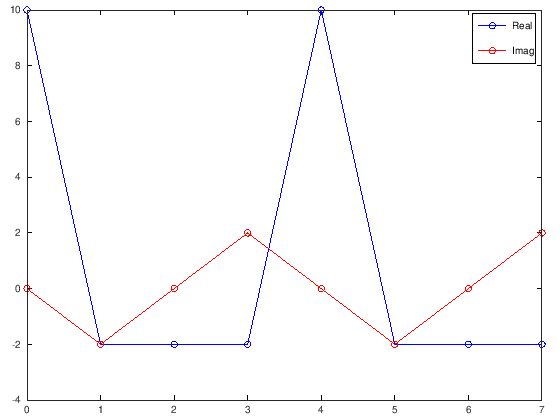

In [2]:
v = [1 2 3 4];
s = v*W;
plot(k,real(s),'bo-',k,imag(s),'ro-');hold on;
legend(["Real";"Imag"])


Le signal est imaginaire, car les ondes fréquentielles ont une symétrie de Hilbert (voir [FREQ2 fréqs négatives](FREQ2_ondes_discretes.ipynb#A3---Fr%C3%A9quences-n%C3%A9gatives)) :
 - $w_0$ et $w_2$ sont des ondes réelles (constante et signal de Nyquist)
 - $w_1$ est complexe et égal à $w_5$ et $w{-3}$ par périodicité fréquencielle N=4 (voir [FREQ2 périodicité](FREQ2_ondes_discretes.ipynb#A4---P%C3%A9riodicit%C3%A9-selon-les-fr%C3%A9quences))
 - $w{-1}$ est le conjugué de $w_1$ et est égal à $w_3$ par périodicité de 4.

Donc dans la base $W$, $w_0$ et $w_2$ sont réels ; $w_1$ et $w_3=w_{-1}$ sont conjugués.

### Exercice

Modifiez une valeur du vecteur $v$ précédent pour obtenir un signal réel.

### Le corrigé 

est caché dans la cellule ci-dessous.

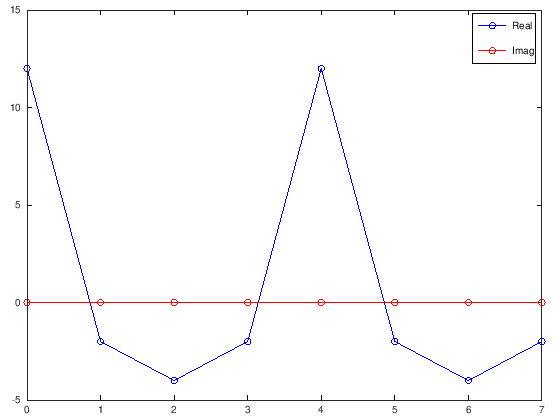

In [3]:
% il suffit d'ajouter les conjugués pour avoir du réel
v = [1   2   3  2];
%    w0 w1  w2  w3=w-1=/w1
v = [1 4 3 4]; %%marche aussi 

s = v*W;
plot(k,real(s),'bo-',k,imag(s),'ro-');
legend(["Real";"Imag"])

### Affichage du spectre

On peut représenter le module et l'argument de $\hat{S}$ pour avoir le spectre du signal en fonction de la fréquence.

Pour cela on se rappelle la discrétisation des fréquences ([FREQ2 discrétisation fréquencielle](FREQ2_ondes_discretes.ipynb#B---Discr%C3%A9tisation-fr%C3%A9quentielle)) et la relation :
$f\leftrightarrow n.F_0$ avec $F_0=\frac{F_e}{N}$ la résolution fréquentielle.

**Remarquez bien que le signal temporel est de période $T_0$ soit $\frac{T_0}{T_e}=N$ en discret** 

On construit un vecteur des fréquences `f` associé à `n` pour afficher $\hat{S}$ en fonction des fréquences discrétisée. On va considérer que $F_e=10$ Hz.

Comparons avec ce que donne l'algorithme `fft` (Fast Fourier Transform)

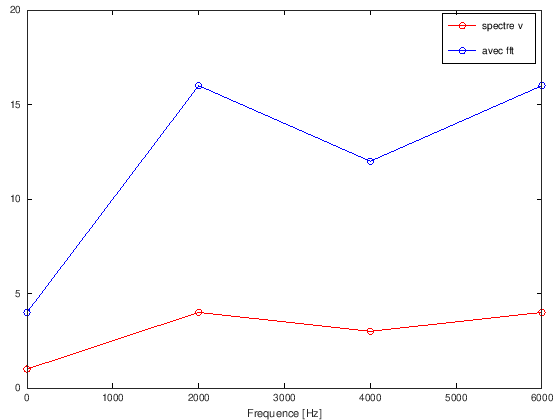

In [4]:
n=0:3;  %fréquences discrètes
N=4;
Fe=8e3;  % pour 8.10^3 notation
F0=Fe/N;
f = n*F0;
plot(f,abs(v),'ro-'); hold on;
xlabel("Frequence [Hz]");

% on prend les 4 premiers échantillons de s
s=s(1:4);
fft_s = fft(s);
plot(f,abs(fft_s),'bo-');
legend(["spectre v";"avec fft"])

La TFD (et donc son algo rapide FFT) ne normalise pas les signaux : 
> pour économiser une division par N de tous les coefficients la FFT amplifie par N les composantes

À nous de diviser par N...

De plus on rappelle qu'il y a **périodicité des fréquences** :
 - pour $\vec{w_0}$, $n=0\quad\leftrightarrow \quad f=0.F_0 = 0$kHZ$ \quad\equiv 0+F_e = 8$kHz = $\vec{w_4}$
 - pour $\vec{w_1}$, $n=1\quad\leftrightarrow \quad f=1.F_0 = 2$kHz$ \quad\equiv F_0-F_e = -6$kHz = $\vec{w_{-3}}$ 
 - pour $\vec{w_2}$, $n=1\quad\leftrightarrow \quad f=2.F_0 = 4$kHz$ \quad\equiv F_0-F_e = -4$kHz = $\vec{w_{-2}}$ (Nyquist !)
 - pour $\vec{w_3}$, $n=1\quad\leftrightarrow \quad f=3.F_0 = 6$kHz$ \quad\equiv F_0-F_e = -2$kHz= $\vec{w_{-1}}$

On aimerait afficher non pas :
 - $[1, 2, 3, 4]$ de $0$ à $F_e$, mais avec les fréquences négatives 
 - $[3, 4, 1, 2]$ de $-\frac{F_e}{2}$ à $\frac{F_e}{2}-F_0$

On peut observer la symétrie de Hilbert autour de 0 Hz au lieu de l'observer autour de la fréquence de Nyquist $f_q=\frac{F_e}{2}$.

Pour faire ce décalage de $-f_q=\frac{F_e}{2}$, mais périodique la fonction `fftshift` fait le job ...

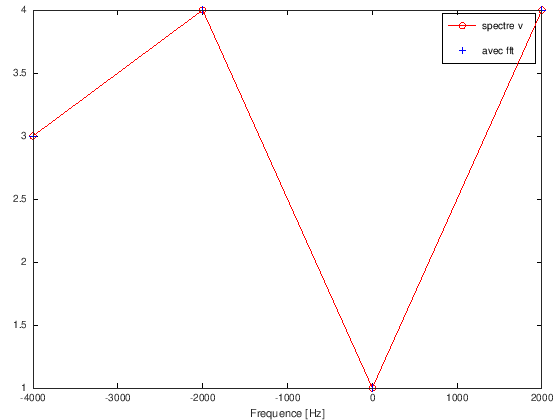

In [5]:
n=0:3;  %fréquences discrètes
N=4;
Fe=8e3;  % pour 8.10^3 notation
F0=Fe/N;
f = n*F0;
Fq = Fe/2;
fshift = f- Fq;
plot(fshift,fftshift(abs(v)),'ro-'); hold on;
xlabel("Frequence [Hz]");

% on prend les 4 premiers échantillons de s
s=s(1:4);
fft_s = fft(s);
plot(fshift,fftshift(abs(fft_s)/N),'bo+');
legend(["spectre v";"avec fft"]);

Si vous avez pris le vecteur $v=[1, 2, 3, 4]$ vous observez qu'il n'y a pas de symétrie de Hilbert (ni autour de 0, ni autour de $f_q=\frac{F_e}{2}$) :
> pas symmétrie de Hilbert en fréquence <=> pas réels en temporel 

Si vous avez gardé le vecteur $v=[1, 2, 3, 2]$ vous observez qu'il y a symétrie de Hilbert (et autour de 0, et autour de $f_q=\frac{F_e}{2}$) :
> symmétrie de Hilbert en fréquence <=> signal réel en temporel 



### Exercice : USAP

 <img src="./usap.png" width=100 />
 
On vous donne le spectre (calculé avec `fft`) d'un signal d'une supportrice de l'USAP.

 - 1 affichez le module de ce spectre et vérifiez qu'il s'agit d'un signal réel en observant s'il y a symétrie de Hilbert. Pour observer la phase utilisez la fonction `angle` pour avoir l'argument du phaseur et la fonction `unwrap` pour éliminer les modulos $2\pi$ et donner une courbe de phase "continue"
 - 2 Effectuez une transformée inverse du spectre et écoutez le signal (`help audiowrite`pour voir comment faire un .wav)
 - 3 Mesurez à l'œil la fréquence du sifflement parasite en zoomant dans le spectre.
 - 4 Calculez la matrice W en adaptant $n$ et en choisissant $k$ 4 fois plus long que le signal (**le calcul peut prendre plusieur secondes et de la RAM**)pour savourer la périodicité de ce signal. **Attention `fft` donne des spectres N fois trop grand par rapport à W** ne pas saturer le son ave cune amplitude trop grande.
 
Mieux vaut lancer Octave/matlab et non pas les notebooks pour pouvoir profiter des figures interactives.

Lancez octave avec la commande `cd ~/signal_discret/tp && octave --force-gui &` dans un terminal (CTRL+ALT+T). 
Commencez par recopier ce code dans un fichier `.m` et l'exécuter 

ans =

      1   3000

Fe =  8000


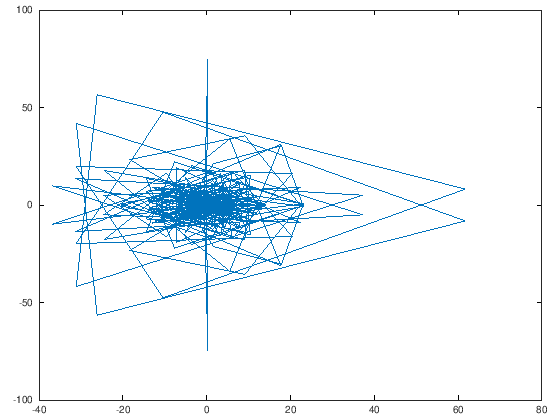

In [6]:
clear all; close all; clc ; 
load usap.mat
size(S)
plot(S) % Eh oui ! c'est un spectre complexe...
Fe


### Corrigé USAP

Déroulez les cellules cachées ici.

ans =

      1   3000



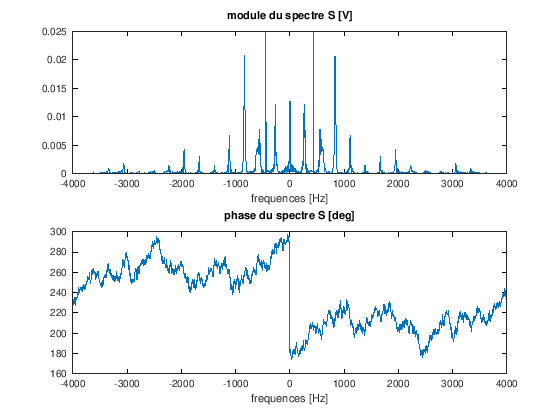

In [7]:
clear all;
load usap.mat
size(S)
N=length(S);
n=0:(N-1);  %fréquences discrètes
F0=Fe/N;
f = n*F0;
Fq = Fe/2;
fshift = f- Fq;
subplot(211)
plot(fshift,fftshift(abs(S)/N));
xlabel("frequences [Hz]");
title("module du spectre S [V]");
subplot(212)
plot(fshift,fftshift(unwrap(angle(S)/pi*180)));hold on;
%plot(fshift,fftshift((angle(S))/pi*180));
xlabel("frequences [Hz]");
title("phase du spectre S [deg]");



On voit que 
  - le module est pair et en zoomant que 
  - la phase est impaire
  
Il y a symétrie de Hilbert, on ajoute que des ondes conjuguées complexes => un signal réel

Vérifions en temporel

In [8]:
s = ifft(S);
re = real(s);
im = imag(s);
re*re'   % produit scalaire => norme 2 au carré
im*im'   % idem : on voit qu'il pèse quasi 0 
%% c'est donc du réel

%% Faison un fichier audio avec ausio write
audiowrite('usap.wav',re,Fe);

ans =  32.706
ans =    8.3394e-31


On entend une douce voix et un sifflement bien pur et bien pénible.

- En zoomant on voit un pic à 440 Hz et -440 Hz : c'est un LA4 (LA de l'octave 4).  
  Rien aux multiples 440*2 (LA5) 440*3(la quinte du LA=MI) 440*4(LA6).

 - Le paquet étalé autour de 300 Hz avec les harmoniques autour de 600 HZ, 900 Hz correspondent à la voix. C'est un signal pseudo-périodique.

Calculons la matrice W

In [9]:
k = 0:4*N;          %environ 4 fois plus long
q = exp(i*2*pi/N);  %phaseur de rotation 

% il faut fair eun produit (Nx1) pour n . (1x4N) pour k
% on obtient la matrice des produit nm (Nx4N)
% fréquences en rangées et temps en colonnes
tic
W = q.^(transpose(n)*k);
toc

size(W)
taille_Moctets = size(W)(1)*size(W)(2)*8/1024/1024

Elapsed time is 5.43826 seconds.
ans =

    3000   12001

taille_Moctets =  274.68


Sur un PC performant le calcul mets environ 10 secondes et la RAM n'explose pas avec W qui pèse quand même environ 300 Mo (un flottant double est codé sur 8 octets).

Calculons la transofrmée inverse par simple produit.

In [10]:
tic
sw = S/N*W;
temps_avec_W = toc

tic
s=ifft(S);
temps_avec_fft=toc

audiowrite('mon_usap.wav',real(sw),Fe);

temps_avec_W =  0.069511
temps_avec_fft =  0.0027831


Oui fft va plus vite et encore plus si N est une puissance de 2...


La périodicité USAPUSAPUSAPUSAP peut être mal perçue à Perpignan.

## B - Filtrage fréquentiel
---

Filtrer c'est simplement multiplier les coefficients de $\hat{S}$ pour amplifier ou annuler des fréquences. 

$$ \hat{Y} = G.\hat{X} $$ 

### Execice 

Essayons avec un filtre idéal $G$ d'enlever le sifflement à 440 Hz. On veut $G[n]=0$ pour les fréquences proches du LA4 et $1$ sinon.

Profitez aux maximum des fonction anonymes comme :

̀`passe_haut = @(f) f>420;`
 
N'oubliez pas qu'un **filtre discret réel doit ête périodique et de symétrie Hilbertienne**
 

### Corrigé

Il a fallu couper aussi quelques harmonique à 440.2 440.3...

Le reste est caché...

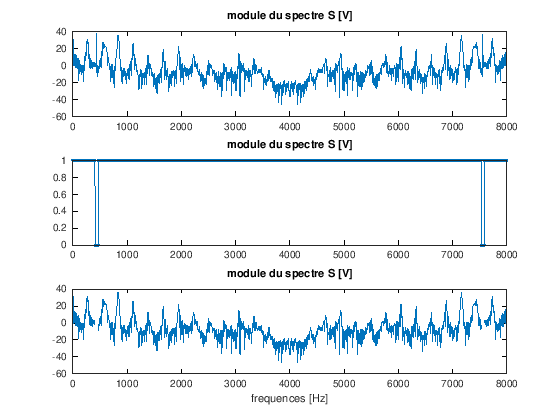

In [11]:
clear all;
load usap.mat
N=length(S);
n=0:(N-1); 
F0=Fe/N;
f = n*F0;
Fq = Fe/2;

passe_haut = @(f,fc) (f>fc).*(f<(Fe-fc)) ;
passe_bas = @(f,fc) 1 - passe_haut(f,fc) ;
coupe_bande = @(f,fmin,fmax) passe_bas(f,fmin) + passe_haut(f,fmax);

centre = 440;
ecart = 30;
fmin=centre-ecart;
fmax=centre+ecart;

G = coupe_bande(f,fmin,fmax); % .* coupe_bande(f,fmin*2,fmax*2).*coupe_bande(f,fmin*3,fmax*3);
Y = G .* S;
n_a_voir = round(400/F0):round(480/F0);
n_a_voir = 1:N;
subplot(311)
plot(f(n_a_voir),20*log10(abs(S(n_a_voir))));
title("module du spectre S [V]");
subplot(312)
plot(f,abs(G),'.-');
title("module du spectre S [V]");
box off;
subplot(313)
plot(f(n_a_voir),20*log10(abs(Y(n_a_voir))));
xlabel("frequences [Hz]");
title("module du spectre S [V]");

audiowrite("usap_filtre.wav",real(ifft(Y)),Fe)

Calculons notre filtre et notre TFD inverse avec un temporel 4 fois plus long pour montrer la N-périodicité temporelle de la représentation TFD N-periodique en fréquence.

In [12]:
k = 0:(4*N-1);          %environ 4 fois plus long
q = exp(i*2*pi/N);  %phaseur de rotation 
tic
W = q.^(transpose(n)*k);
tps_calcul_W=toc
tic
s_per = (G.*S)*W/N;
tps_calcul_filtre_et_tfd_inverse = toc

audiowrite("mon_usap_filtre.wav",real(s_per),Fe)

tps_calcul_W =  5.4497
tps_calcul_filtre_et_tfd_inverse =  0.055392


### Phase d'un filtre : le filtre retard

Il n'y a pas que le module de $G$ qui compte, il y a aussi sa phase, car $G[n]$ est un nombre complexe qui amplifie et **déphase aussi** la composante $\vec{w_n}$.

> Le coefficient $G[n]$ du filtre est le phaseur à appliquer à la composante $\hat{X}[n].\vec{w_n}$ du signal d'entrée :   
> $\hat{Y}[n].\vec{w_n} = G[n].\hat{X}[n].\vec{w_n}$ 

### Exercice

Prenez votre signal Y filtré et appliquez un filtre $R$ qui va avancer le signal d'un temps $\tau=j.T_e$ avec j=612 environ.

Pour cela prenez l'onde $w_n[k] = e^{i2\pi.n F_0.k T_e}$ et avancez-la de $j$ échantillons en posant $w_n[k+j]$. Un phaseur complexe doit apparaître devant $w_n[k]$...

Autre vision : le gain d'un retard est 1. Une onde de fréquence $n.F_0$ avancée d'un temps $\tau$ est déphasée de $+\frac{\tau}{T_0/n}.2\pi$ : vous avez le module et l'argument du phaseur...


### Corrigé

Caché là

tau =  0.17500


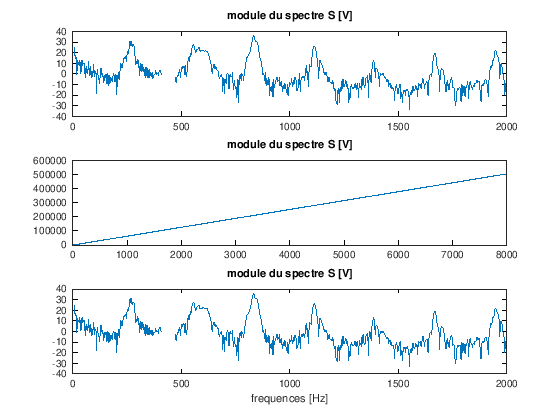

In [13]:
Te=1/Fe;

j=1400;
tau=j*Te
R = exp(i*2*pi*n/N*j);
Z = R .* Y;
n_a_voir = round(10/F0):round(2000/F0);
subplot(311)
plot(f(n_a_voir),20*log10(abs(Y(n_a_voir))));
title("module du spectre S [V]");
subplot(312)
plot(f,unwrap(angle(R))/pi*180);
title("module du spectre S [V]");
box off;
subplot(313)
plot(f(n_a_voir),20*log10(abs(Z(n_a_voir))));
xlabel("frequences [Hz]");
title("module du spectre S [V]");

audiowrite("sapu.wav",real(ifft(Z)),Fe)

% en périodique 
audiowrite("mon_sapu.wav",real(Z*W/N),Fe)

Oui la fonction de transfert $e^{-\tau.p}$ pour le retard, devient en discret $e^{-i2\pi\frac{n}{N}\overbrace{\frac{\tau}{T_e}}^{j}}$, le retard de $j$ échantillons.

Une avance n'est pas causale !  
Mais comme **le signal d'une FFT est toujours N périodique** 

> l'avance de usap|usap|usap de 1400 et ben sapu|sapu|sapu  
> c'est un retard de N-1400 qui donne la même chose : sapu|sapu

On aurait eu le meme effet dans les pyrénnées avec aspet|aspet|aspet...

## C - Projection : produit scalaire
---

Nous savons faire une TFD inverse, mais pas encore la TFD.
Le problème consiste à savoir quelle est l'amplitude $\hat{S}[n]$ de $\vec{w_n}$ dans le signal $\vec{s}$.

Pour cela on cherche un produit scalaire $<\vec{u}, \vec{v}>$ qui ait les bonnes propriétées. De plus si, avec ce produit scalaire, la base $W=\left(\vec{w_n}\right)_{n=0..N-1}$ est orthonormée alors on peut avoir directement les coordonnées avec le théorèle de pythagore :
$\hat{S}=\left[\begin{array}{l} <\vec{s},\vec{w_0}>\\\dots\\<\vec{s},\vec{w_n}>\\\dots\\<\vec{s},\vec{w_{N-1}}>\end{array}\right]_W$ 

La formule de la TFD serait alors $\hat{S}[n]=<\vec{s},\vec{w_n}> ,\quad \forall n \in [\![0 ; N[\![$

Reprenons le cas où N=4, et vérifions que la base $(w_n)$ est orthogonale :
 - $<\vec{w_n},\vec{w_n}>=1$
 - $<\vec{w_i},\vec{w_j}>=0$ pour $i\neq j$

Utilisons le produit scalaire basique définit à partir du produit de vecteur de coordonnées :
$<\vec{u}, \vec{v}> = u . {}^T\!v$ pour des vecteurs en rangées (1xN)

On peut calculer tout les produits scalaires en faisant le produit $W.{}^T\!W$


In [14]:
clear all; format short;
N=4;
k = 0:(N-1);        % inutile d'aller plus loin ! 
                    %c'est N périodique en temps...
n = transpose(k);   % inutile d'aller plus loin ! 
                    %c'est N périodique en fréquence...  
q = exp(i*2*pi/N);    % q=i ici
W = q .^ (n*k);      
w_0 = W(1,:); % Première rangée le signal constant w0
w_1 = W(2,:); 

% fonction qui arrondi au centième pour y voir clair
centiemes = @(x) round(x*100)/100 ; 

norme2_carre_w_0 = centiemes(w_0*transpose(w_0))
norme2_carre_w_1 = centiemes(w_1*transpose(w_1))

tout_les_ps = centiemes(W*transpose(W))

norme_carre_de_iiii=(w_0*i)*transpose(w_0*i)

norme2_carre_w_0 =  4
norme2_carre_w_1 = 0
tout_les_ps =

   4  -0   0   0
  -0   0   0   4
   0   0   4  -0
   0   4  -0   0

norme_carre_de_iiii = -4


On voit que les signaux réels $w_0$ et $w_2$ sont orthogonaux :
> pour les signaux réels pas de problème

En revanche les signaux complexes $\vec{w_1}$ et $\vec{w_3}$ sont hortogonaux à eux-mêmes sans être nul... 

> Le produit scalaire usuel n'est pas définit pour signaux complexes

On a même la norme (mesure de longueur **toujours positive**) de $i.\vec{w_0}=(i, i ,i ,i)$ (le signal constant imaginaire) qui vaut -4 !

Voilà pourquoi le produit scalaire est modifié en continu en $<\vec{u},\vec{v}>=\int u(t).\overline{v(t)}.dt$ et pour nous en discret devient :

$$ <\vec{u},\vec{v}> = \sum\limits_{k=0}^{k=N-1} u[k].\overline{v[k]} = u .{}^T\!\overline{v} = u . {}^H\!v$$

Ce produit scalaire avec le conjugué est appelé produit Hilbertien et noté ${}^H\!u$.
On l'obtient avec matlab/octave avec `u'`.

Vérifions :


In [15]:
produits_hilbertiens = centiemes(W*W')

produits_hilbertiens =

   4  -0   0   0
  -0   4  -0  -0
   0  -0   4  -0
   0  -0  -0   4



### Exercice de décomposition

Décomposons une onde sinusoïdale $A_n.\cos(t+\varphi)$ en phaseurs complexes sous forme $c(1).e^{i.t}+c(-1).e^{-i.t}$.

Au lieu d'utiliser les phaseurs (revoir [FREQ1_phaseurs](FREQ1_phaseurs.ipynb)) on va bourriner en cherchant les amplitudes $c(1), c(-1)$ par projection. 

Complétez le script avec la formule analytique et le calcul numérique par projection.

Te =  0.050000
norme_carre =  21.000
orthogonal =   9.3773 + 14.6043i


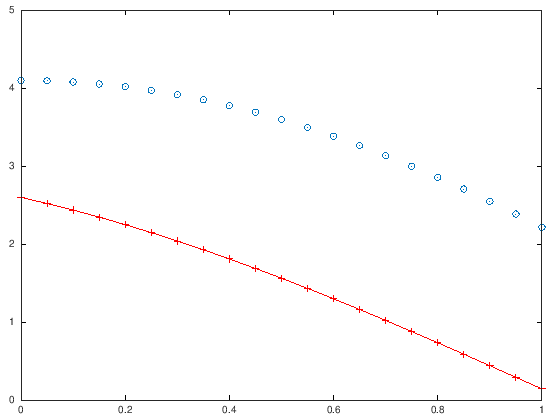

In [16]:
clear all;
T0=1;
Te=T0/20
t=0:T0/20:T0;
A=3;
phi=pi/6;
s= A*cos(t+phi);
plot(t,s,'r-+'); hold on;

%% Zut ! j'arrive pas à voir une période entière...
%% ..pour avoir orthogonalité
w1 = exp(i*t);
wm1 = exp(-i*t);
norme_carre = w1*w1'
orthogonal = w1*wm1'

%% analytique phaseurs ...
c1=A*cos(phi);
cm1=A*sin(phi);
s_phaseur = c1*w1 + cm1*wm1;
plot(t,s_phaseur,'o');
%% Zut ça colle pas.


###  Corrigé
Caché ici

Te =  0.31416
norme_carre =  20
orthogonal = -8.8818e-16 - 1.1102e-16i
c1 =  1.29904 + 0.75000i
cm1 =  1.29904 - 0.75000i


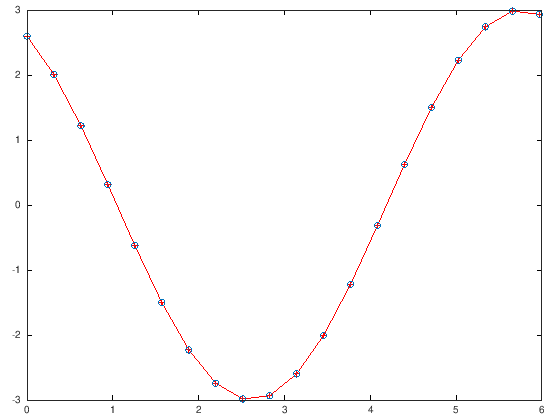

In [17]:
clear all;
%% ERREUR 1 : la période est 2*pi !
T0=2*pi;
Te=T0/20
%% ERREUR 2 : un point de trop !
t=0:T0/20:T0-Te; % potaux et intervalles...
% ou bien on fait
N=20;
k=0:(N-1);
t=k*Te;

A=3;
phi=pi/6;
s= A*cos(t+phi);
plot(t,s,'r+-'); hold on;

w1 = exp(i*t);
wm1 = exp(-i*t);
norme_carre = w1*w1'
orthogonal = w1*wm1'

%% analytique phaseurs ...
phaseur = A*exp(i*phi);
c1=phaseur/2
cm1=conj(c1)
s_phaseur = c1*w1 + cm1*wm1;
plot(t,s_phaseur,'o');



Attention $\vec{w_1}$ et $\vec{w_{-1}}$ sont orthogonaux, mais pas normés !

Il faut normer le vecteur avec $\frac{\vec{w_1}}{\|\vec{w_1}\|}$ puis projeter sur le signal $\vec{s}$ avec :

$$ \alpha = \left<\vec{s}, \frac{\vec{w_1}}{\|\vec{w_1}\|}\right>$$

La composante de $\vec{s}$ colinéaire à $\vec{w_1}$ est alors :

$$ \alpha .\frac{\vec{w_1}}{\|\vec{w_1}\|} = \left<\vec{s}, \frac{\vec{w_1}}{\|\vec{w_1}\|}\right> . \frac{\vec{w_1}}{\|\vec{w_1}\|} = \left<\vec{s}, \frac{\vec{w_1}}{\|\vec{w_1}\|^2}\right>.\vec{w_1} = \underbrace{\frac{<\vec{s}, \vec{w_1}>}{<\vec{w_1}, \vec{w_1}>}}_{c(1)}.\vec{w1}$$

Vérifions 

In [18]:
c1_scal = s*w1'/(w1*w1')
c1

c1_scal =  1.29904 + 0.75000i
c1 =  1.29904 + 0.75000i


On retrouve ainsi la formule de la TFD :

$\hat{S}[n] = <\vec{s},\vec{w_n}> = \sum\limits_{n=0}^{N-1}s[k]. \overline{e^{i.2\pi.\frac{n.k}{N}}}$

Comme la norme carrée $\|\vec{w_n}\|^2=N$ il faudrait diviser les ondes par $\sqrt{N}$ lors des calculs de TFD et de TFD inverse. 

**La TFD n'est pas normée par frugalité numérique : on divise par N uniquement pour la TFD inverse** 

## D - Décomposition dans la base de fréquencielle : TFD
---

Il faudrait normer les ondes $\vec{w_n}$ en $\frac{\vec{w_n}}{\sqrt{N}}$ ce qui couterait trop cher en temps de calcul dans la pratique, pour pas grand-chose...

> La TFD et son algo. rapide FFT ne sont **pas des isomorphismes pour raison de frugalité des calculs** : la TFD amplifie la norme de $\sqrt{N}$ car $\|\hat{S}\|^2=N.\|\hat{s}\|^2 $

$W.{}^H\!W = N.\mathrm{Id} \implies \underbrace{\frac{W}{N}}_{TFD^{-1}}. \underbrace{{}^H\!W}_{TFD} = \mathrm{Id}\quad $non isomorphique mais frugal 

$W.{}^H\!W = N .\mathrm{Id} \implies \underbrace{\frac{W}{\sqrt{N}}}_{TFD^{-1}}. \underbrace{\frac{{}^H\!W}{\sqrt{N}}}_{TFD} = \mathrm{Id}\quad$ isomorphique mais non frugal 


On peut calculer une TFD frugale par simple produit hilbertien avec la matrice $W$ :
> $s.{}^H\!W = \hat{S}$, mais dans ce cas $\|\hat{S}\| = \sqrt{N}.\|s\|$

Vérifions que l'on est bien équivalent à `fft` :

In [19]:
clear all; format short;
N=4;
k = 0:(N-1);       
n = transpose(k);
q = exp(i*2*pi/N);
W = q .^ (n*k);      

S = [1, 2, 3, 4];
TFDI = W/N;
TFD = W';

s_mat = S * TFDI;
s_fft = ifft(S);

erreur_s = (s_mat-s_fft)*(s_mat-s_fft)'
norme_s_carre = s_mat*s_mat'

S_fft = fft(s_fft);
S_mat = s_mat*TFD;

erreur_S = (S_mat-S_fft)*(S_mat-S_fft)'
norme_S_carre = S_mat*S_mat'

amplification_au_carre  = norme_S_carre/norme_s_carre

erreur_s =    3.3116e-31
norme_s_carre =  7.5000
erreur_S =    8.6898e-31
norme_S_carre =  30
amplification_au_carre =  4


## E- dualité
---

Considérons maintenant que $v=[1, 2, 3, 4]$ n'est plus un spectre $\vec{\hat{S}}$ mais un signal temporel $\vec{s}$.

Prenons la TFD **isomorphique non frugale** et calculons la TFD de la TFD pour voir !

$TFD\left\{TFD\left\{\vec{s}\right\}\right\} = \vec{y} = ?$

On va noter $\mathcal{F}$ l'opérateur $TFD$ et noter $\mathcal{F}^2$ la composition $\mathcal{F}\circ\mathcal{F}$ 

$\mathcal{F}^2\left\{\vec{x}\right\}=\vec{y}=?$

In [20]:
clear all; format short;
N=4;
k = 0:(N-1);       
n = transpose(k);
q = exp(i*2*pi/N);
W = q .^ (n*k);      
F = W/sqrt(N);
F_inv = W'/sqrt(N);

s = [1, 2, 3, 4];
S = s*F ;
y = S*F ;

centiemes = @(x) round(100*x)/100;
y_reel = centiemes(real(y))
y_imag = centiemes(imag(y))

y_reel =

   1   4   3   2

y_imag =

   0  -0  -0   0



C'est un **signal réel** ! Mais tout embrouillé...

Regardons ce qu'est l'opérateur $\mathcal{F}^2$ matriciellement

In [21]:
F_2 = centiemes(F*F)
s
y=s*F_2

F_2 =

   1  -0   0   0
  -0   0   0   1
   0   0   1  -0
   0   1  -0   0

s =

   1   2   3   4

y =

   1   4   3   2



### Exercice 

1) Sur papier, représentez-vous les signaux $\vec{s}$ et $\vec{y}$ sur plusieurs périodes en marquant bien où est l'instant $0$.  
   Vous aurez peut-être une idée de ce qu'est cet opérateur $\mathcal{F}^2$...
2) Confirmez l'intuition en reprenant le signal `usap.wav` ou un autre. Calculez $\mathcal{F}^2$ de ce signal en utilisant `fft` (attention aux normes pour ne pas saturer le signal). Vérifiez que le signal est bien réel et écoutez-le :  
   si vous étiez aux antipodes de comprendre maintenant le rôle de $\mathcal{F}^2$ dot être clair !
3) Essayez de deviner ce que fait alors $\mathcal{F}^4$ et vérifiez-le en écoutant le signal...



### Corrigé

Caché ici.

In [22]:
clear all;
[s, Fe] = audioread("mon_usap_filtre.wav") ;
N = length(s)
y = fft(fft(s));
Norme_infinie_y = max(abs(y)) 
disp("houlala c'est trop grand, normalisons");
y = y/N; % sqrt(N).sqrt(N) car deux fft
Norme_infinie_y_normalisee = max(abs(y)) 
disp("C'est dans [-1, +1] ça ne sera pas sature")
Norme_infinie_imag_y = max(abs(imag(y)))
disp("C'est bien réel")

audiowrite("pasu.wav",real(y),Fe);
% Le nom du fichier est un indice !


N =  12000
Norme_infinie_y =  5993.8
houlala c'est trop grand, normalisons
Norme_infinie_y_normalisee =  0.49948
C'est dans [-1, +1] ça ne sera pas sature
Norme_infinie_imag_y =    8.7847e-17
C'est bien réel


Oui le son est joué à l'envers !

L'opérateur $\mathcal{F}^2$ est l'opérateur *antipodal* (on joue à l'envers dans le temps, ou on retourne par symétrie de l'axe des abscisses) mais pour des signaux N-périodiques, c'est-à-dire pour $k$ pris modulo N.

Cela veut dire que :
$$ s[\bullet] \overset{\mathcal{F}}{\longrightarrow} \hat{S}[\bullet] \overset{\mathcal{F}}{\longrightarrow} s[-\bullet]$$

On note $s[-\bullet]$ la fonction antipodale $s[-\bullet] : k \mapsto s[-k]$ (on ne mets pas la flêche en haut pour ne pas alourdir l'écriture)

Comme $\hat{S}$ est une fonction discrète de la variable entière $\mathbb{Z}\to\mathbb{C}$ au même titre que $s$ on peut appliquer encore la transormée deux fois à $\vec{hat{S}}$ pour la retourner dans le temps :

$$ s[\bullet] \overset{\mathcal{F}}{\longrightarrow} \hat{S}[\bullet] \overset{\mathcal{F}}{\longrightarrow} s[-\bullet]\overset{\mathcal{F}}{\longrightarrow} \hat{S}[-\bullet]$$

On peut aussi retourner $s[-\bullet]$ en appliquant deux fois la transformée et boucler la boucle :

$$ \dots \overset{\mathcal{F}}{\longrightarrow}s[\bullet] \overset{\mathcal{F}}{\longrightarrow} \hat{S}[\bullet] \overset{\mathcal{F}}{\longrightarrow} s[-\bullet]\overset{\mathcal{F}}{\longrightarrow} \hat{S}[-\bullet] \overset{\mathcal{F}}{\longrightarrow} s[\bullet] \overset{\mathcal{F}}{\longrightarrow} \dots $$


Vérifions :

In [23]:
s_orig = fft(fft(y))/N;
size(y)
size(s_orig)
disp("vecteur verticaux !")
erreur = s_orig -s ;
Norme_2_carre = erreur'*erreur
disp("ce sont les mêmes");


ans =

   12000       1

ans =

   12000       1

vecteur verticaux !
Norme_2_carre =    3.6024e-29
ce sont les mêmes


Vous êtes prête pour tenter le [**défi sur la parité**](../defis/paparite/paparite.ipynb)